## Particle ejection in dressed BH binaries

**Units:**  
    - Masses [M_sun]  
    - Times [s]  
    - Distances [pc]  
    - Speeds [km/s]  
    - Density [M_sun/pc^3]  

In [1]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [9]:
import HaloFeedback

In [10]:
DF = HaloFeedback.PowerLawSpike()

# This defaults to some standard values for the
# density profile and masses:

print("Gamma_sp\t= ", DF.gamma)
print("M_1\t\t= ", DF.M_BH, " M_sun")
print("M_2\t\t= ", DF.M_NS, " M_sun")
print("rho_sp\t\t= ", DF.rho_sp, " M_sun/pc^3")

Gamma_sp	=  2.3333333333333335
M_1		=  1000.0  M_sun
M_2		=  1.0  M_sun
rho_sp		=  226  M_sun/pc^3


In [11]:
r0 = 100*DF.r_isco #Separation of the binary
v_orb = DF.v_circ(r0) #Orbital velocity of the binary

The `HaloFeedback` code can return:

$$ \frac{\mathrm{d}M_\mathrm{ej}}{\mathrm{d}E\mathrm{d}t}$$

the rate of mass ejected from the system, as a function of the specific energy $E = \frac{1}{2}v^2$ of the particles, per unit time. First, let's calculate the total mass ejection rate:

In [12]:
E_grid, dMdEdt = DF.dMdtdE_ej(r0, v_orb)
dMdt = np.abs(np.trapz(dMdEdt, E_grid))
print("Mass ejection rate [Msun/s]:", dMdt)

Mass ejection rate [Msun/s]: 9.532104237197139e-11


Now calculate the velocity distribution of particles (which is a bit more familiar):

<ipython-input-15-ddf9f3eb539e>:11: RuntimeWarning: invalid value encountered in sqrt
  vs = np.sqrt(2*(DF.psi(r0) - DF.eps_grid))


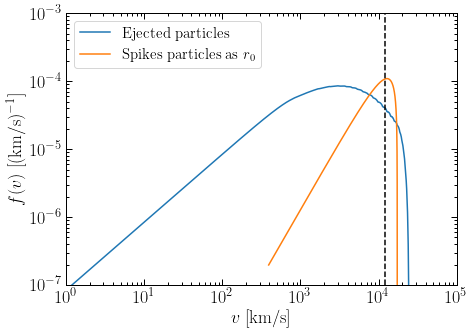

In [15]:
v_grid = np.sqrt(2*np.abs(E_grid))
dMdvdt = v_grid*dMdEdt

dfdv = np.abs(dMdvdt)/dMdt

plt.figure(figsize=(7,5))

plt.loglog(v_grid, np.abs(dfdv), label='Ejected particles')

#Now we plot the distribution of velocities at the orbital radius
vs = np.sqrt(2*(DF.psi(r0) - DF.eps_grid))
plt.loglog(vs, 4*np.pi*vs**2*DF.f_eps/DF.rho_init(r0), label=r'Spikes particles as $r_0$')
plt.axvline(v_orb, linestyle='--', color='k')
#plt.axvline(np.sqrt(2)*v_orb, linestyle='--', color='k')

plt.legend()

plt.xlim(1e0, 1e5)
plt.ylim(1e-7, 1e-3)

plt.xlabel(r"$v$ [km/s]")
plt.ylabel(r"$f(v)$ [$(\mathrm{km/s})^{-1}$]")
plt.savefig("plots/EjectedDistribution.pdf", bbox_inches='tight')
plt.show()